In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
# ignore all warning messages
import warnings
warnings.filterwarnings("ignore")
import os
# set the minimum number of rows to display to 10
pd.set_option('display.min_rows', 20)
import folium

In [2]:
os.chdir("D:\datasetsusa")

In [3]:
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,1/8/2020 0:00,1/8/2020 0:00,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,1/2/2020 0:00,1/1/2020 0:00,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,4/14/2020 0:00,2/13/2020 0:00,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,1/1/2020 0:00,1/1/2020 0:00,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,1/1/2020 0:00,1/1/2020 0:00,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [4]:
df.shape

(673367, 28)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673367 entries, 0 to 673366
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           673367 non-null  int64  
 1   Date Rptd       673367 non-null  object 
 2   DATE OCC        673367 non-null  object 
 3   TIME OCC        673367 non-null  int64  
 4   AREA            673367 non-null  int64  
 5   AREA NAME       673367 non-null  object 
 6   Rpt Dist No     673367 non-null  int64  
 7   Part 1-2        673367 non-null  int64  
 8   Crm Cd          673367 non-null  int64  
 9   Crm Cd Desc     673367 non-null  object 
 10  Mocodes         580800 non-null  object 
 11  Vict Age        673367 non-null  int64  
 12  Vict Sex        585102 non-null  object 
 13  Vict Descent    585097 non-null  object 
 14  Premis Cd       673359 non-null  float64
 15  Premis Desc     673024 non-null  object 
 16  Weapon Used Cd  234430 non-null  float64
 17  Weapon Des

In [6]:
df.isna().sum().sort_values(ascending=False)

Crm Cd 4          673316
Crm Cd 3          671665
Crm Cd 2          622976
Cross Street      563370
Weapon Used Cd    438937
Weapon Desc       438937
Mocodes            92567
Vict Descent       88270
Vict Sex           88265
Premis Desc          343
Premis Cd              8
Crm Cd 1               8
LAT                    0
LOCATION               0
Status Desc            0
Status                 0
DR_NO                  0
Date Rptd              0
Vict Age               0
Crm Cd Desc            0
Crm Cd                 0
Part 1-2               0
Rpt Dist No            0
AREA NAME              0
AREA                   0
TIME OCC               0
DATE OCC               0
LON                    0
dtype: int64

<AxesSubplot:>

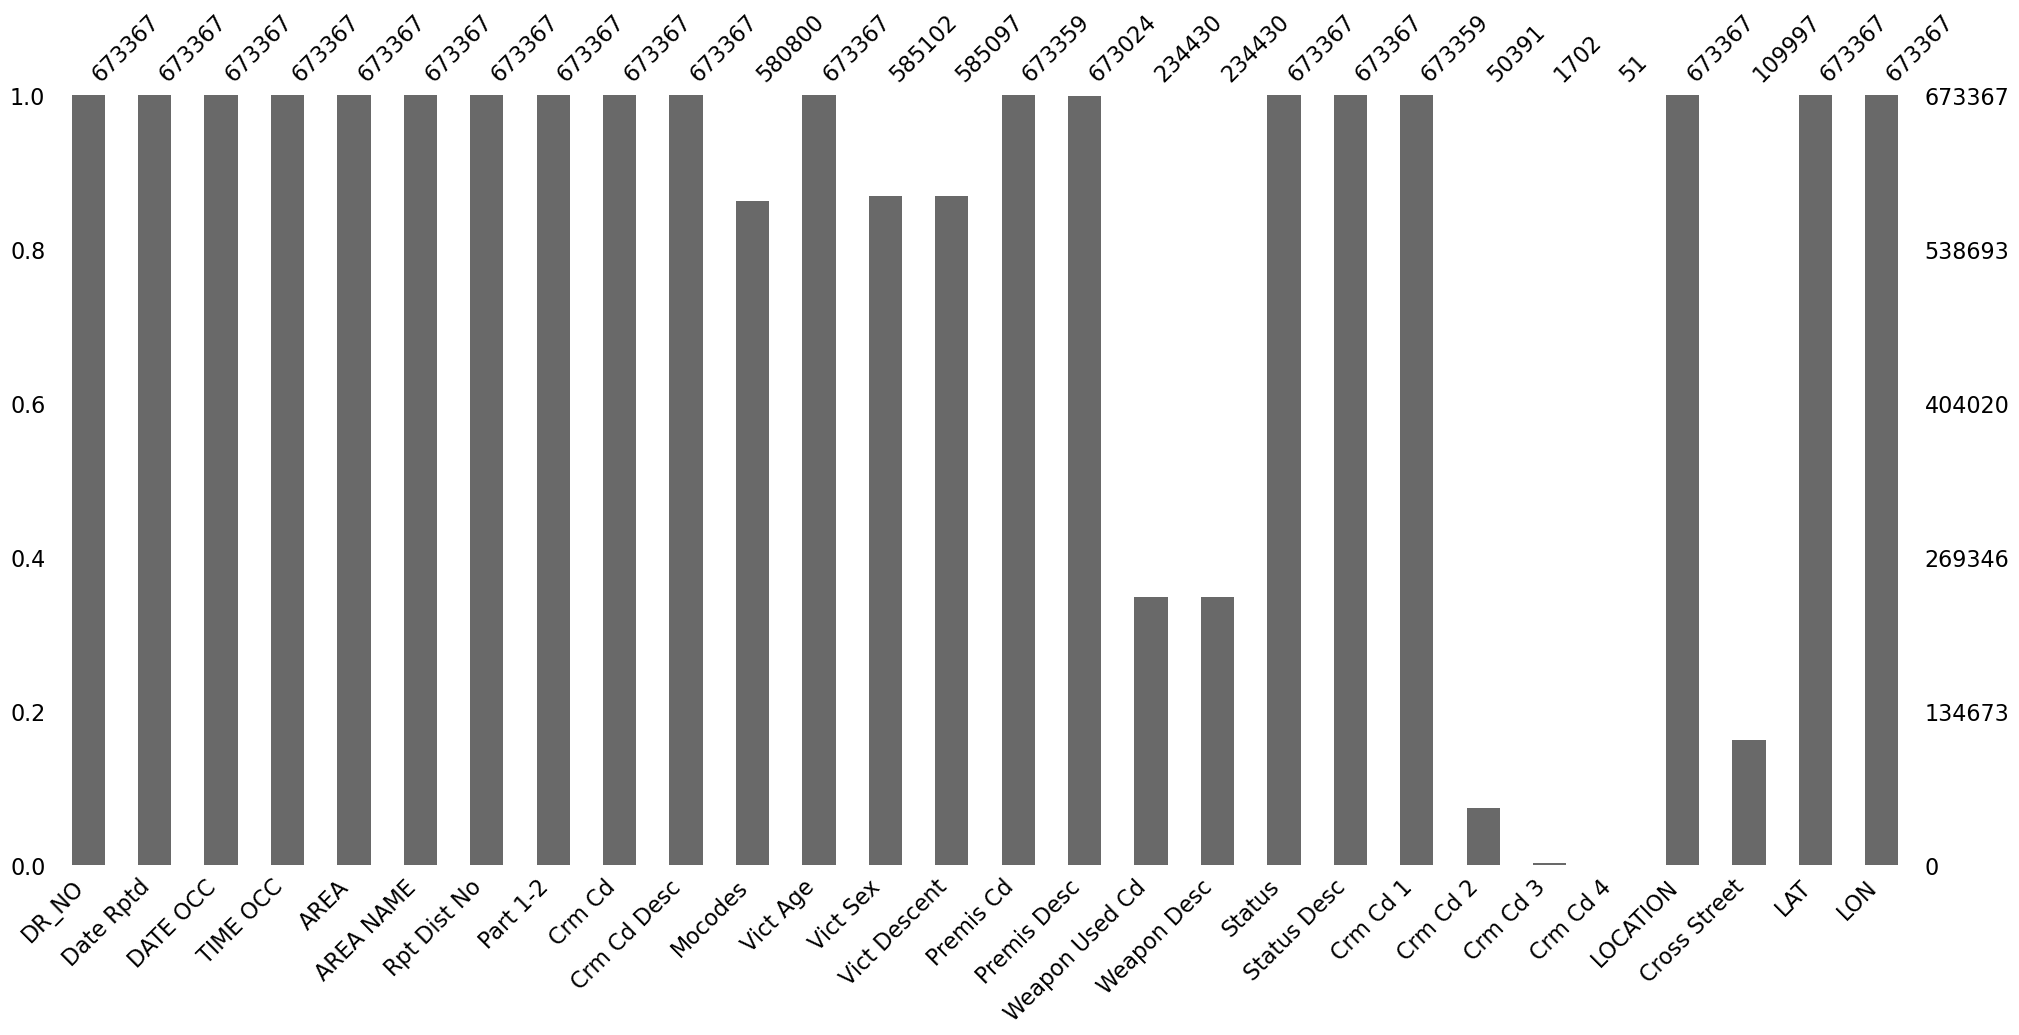

In [7]:
# Visualize null values
msno.bar(df)

In [8]:
df.keys()

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [9]:
df.drop(['Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street','Mocodes','Weapon Used Cd'], axis=1, inplace=True)

In [10]:
df['Weapon Desc'].fillna("not recorded", inplace=True)
df['Vict Sex'].fillna("unidentfied", inplace=True)
df['Vict Descent'].fillna("no record", inplace=True)

In [11]:
df.dropna(inplace=True)

In [12]:
df.isna().sum().sum()

0

In [13]:
df.duplicated().sum()

0

In [14]:
df.dtypes

DR_NO             int64
Date Rptd        object
DATE OCC         object
TIME OCC          int64
AREA              int64
AREA NAME        object
Rpt Dist No       int64
Part 1-2          int64
Crm Cd            int64
Crm Cd Desc      object
Vict Age          int64
Vict Sex         object
Vict Descent     object
Premis Cd       float64
Premis Desc      object
Weapon Desc      object
Status           object
Status Desc      object
Crm Cd 1        float64
LOCATION         object
LAT             float64
LON             float64
dtype: object

In [15]:
# Convert Date Rptd and DATE OCC columns to datetime format
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

In [16]:
# Extract month column using dt accessor
df['Month'] = df['DATE OCC'].dt.month

In [17]:
df['Month Name'] = df['DATE OCC'].dt.month_name()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 673016 entries, 0 to 673366
Data columns (total 24 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         673016 non-null  int64         
 1   Date Rptd     673016 non-null  datetime64[ns]
 2   DATE OCC      673016 non-null  datetime64[ns]
 3   TIME OCC      673016 non-null  int64         
 4   AREA          673016 non-null  int64         
 5   AREA NAME     673016 non-null  object        
 6   Rpt Dist No   673016 non-null  int64         
 7   Part 1-2      673016 non-null  int64         
 8   Crm Cd        673016 non-null  int64         
 9   Crm Cd Desc   673016 non-null  object        
 10  Vict Age      673016 non-null  int64         
 11  Vict Sex      673016 non-null  object        
 12  Vict Descent  673016 non-null  object        
 13  Premis Cd     673016 non-null  float64       
 14  Premis Desc   673016 non-null  object        
 15  Weapon Desc   673

In [19]:
df.nunique()

DR_NO           673016
Date Rptd         1154
DATE OCC          1154
TIME OCC          1439
AREA                21
AREA NAME           21
Rpt Dist No       1194
Part 1-2             2
Crm Cd             137
Crm Cd Desc        137
Vict Age           102
Vict Sex             5
Vict Descent        20
Premis Cd          307
Premis Desc        306
Weapon Desc         80
Status               6
Status Desc          6
Crm Cd 1           139
LOCATION         60975
LAT               5377
LON               4958
Month               12
Month Name          12
dtype: int64

In [20]:
df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Crm Cd 1,LAT,LON,Month
count,6.730160e+05,673016.000000,673016.000000,673016.000000,673016.000000,673016.000000,673016.000000,673016.000000,673016.000000,673016.000000,673016.000000,673016.000000
mean,2.128589e+08,1333.841008,10.720533,1118.426963,1.416317,500.816602,30.001722,304.333086,500.556490,33.958857,-117.955489,6.288341
std,9.122228e+06,654.540696,6.089879,608.983704,0.492948,207.902269,21.673297,216.291144,207.692259,1.976924,6.856746,3.526225
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-2.000000,101.000000,110.000000,0.000000,-118.667600,1.000000
25%,2.019078e+08,900.000000,6.000000,622.000000,1.000000,330.000000,12.000000,101.000000,330.000000,34.013200,-118.429600,3.000000
50%,2.115043e+08,1412.000000,11.000000,1142.000000,1.000000,442.000000,31.000000,203.000000,442.000000,34.058300,-118.321400,6.000000
75%,2.210051e+08,1900.000000,16.000000,1619.000000,2.000000,626.000000,45.000000,501.000000,626.000000,34.163100,-118.273900,9.000000
max,2.399060e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,971.000000,956.000000,34.334300,0.000000,12.000000


In [21]:
# Calculate total number of crimes reported
total_crimes = df.shape[0]
print("Total crimes reported:", total_crimes)

Total crimes reported: 673016


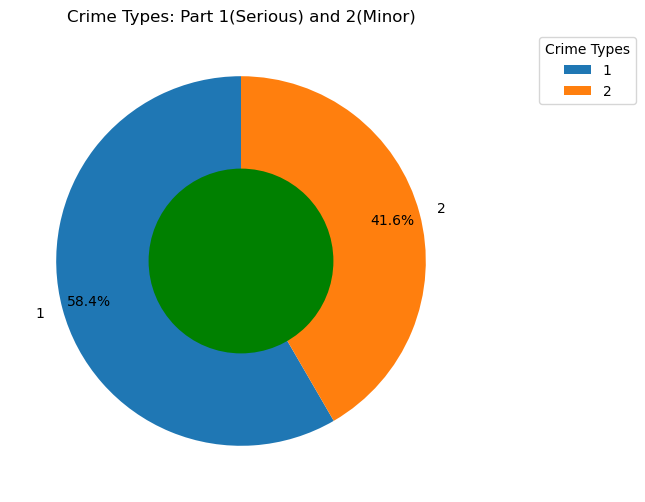

In [22]:
# Count crimes by Part 1-2
part_counts = df['Part 1-2'].value_counts()

# Set up plot
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(part_counts, labels=part_counts.index,
                                   autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops={'width': 0.6})

# Add circle to create donut chart
centre_circle = plt.Circle((0,0),0.50,fc='green')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add title
plt.title("Crime Types: Part 1(Serious) and 2(Minor)")

# Add legend
plt.legend(wedges, part_counts.index, title="Crime Types", loc="upper center", bbox_to_anchor=(1, 0, 0.5, 1))

# Show plot
plt.show()

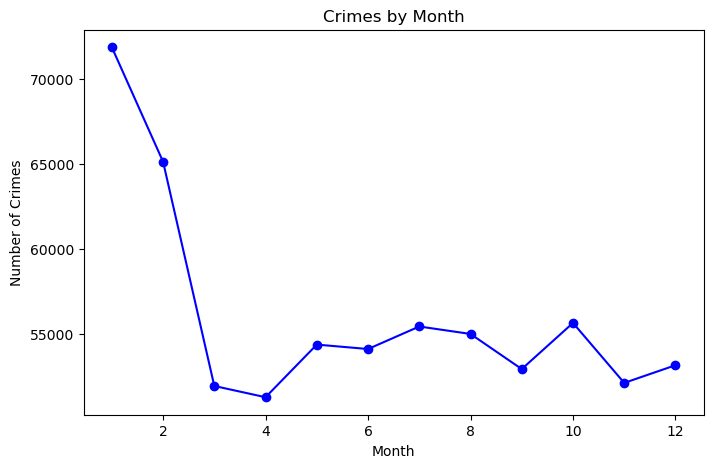

In [23]:
 #Count crimes by month
crime_counts = df.groupby('Month')['DR_NO'].count()

# Set up plot
plt.figure(figsize=(8,5))
plt.plot(crime_counts.index, crime_counts.values, 'o-', color='blue')

# Add labels
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Crimes by Month')

# Show plot
plt.show()

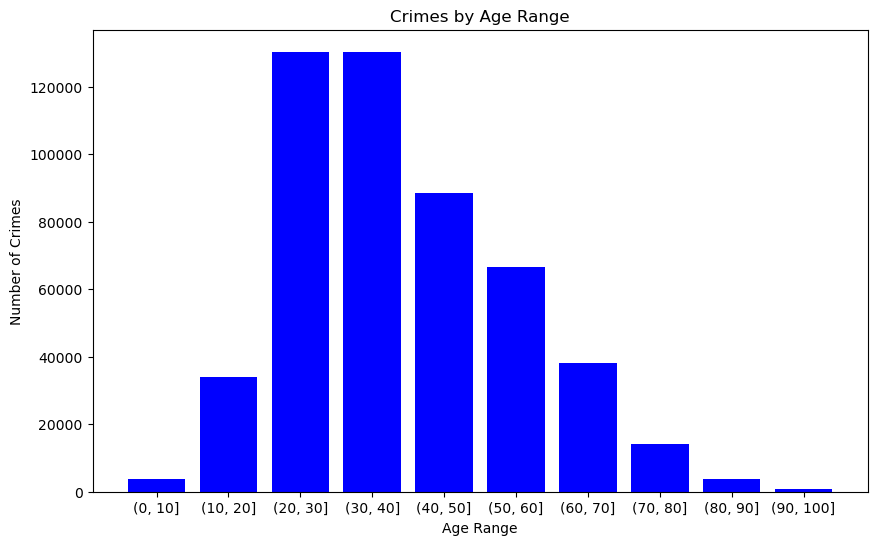

In [24]:
# Group victim ages by bins of 10
df['Age Range'] = pd.cut(df['Vict Age'], bins=range(0, 110, 10))

# Count number of crimes by age range
age_counts = df.groupby('Age Range')['DR_NO'].count()

# Create bar chart
plt.figure(figsize=(10,6))
plt.bar(age_counts.index.astype(str), age_counts.values, color='blue')
plt.title('Crimes by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Number of Crimes')
plt.show()

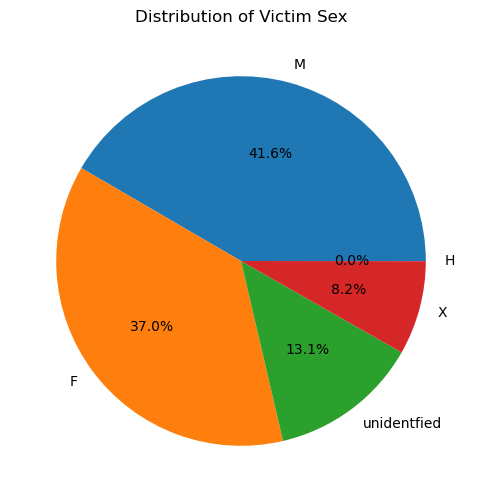

In [25]:
# Count number of crimes by victim sex
sex_counts = df['Vict Sex'].value_counts()

# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(sex_counts.values, labels=sex_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Victim Sex')
plt.show()

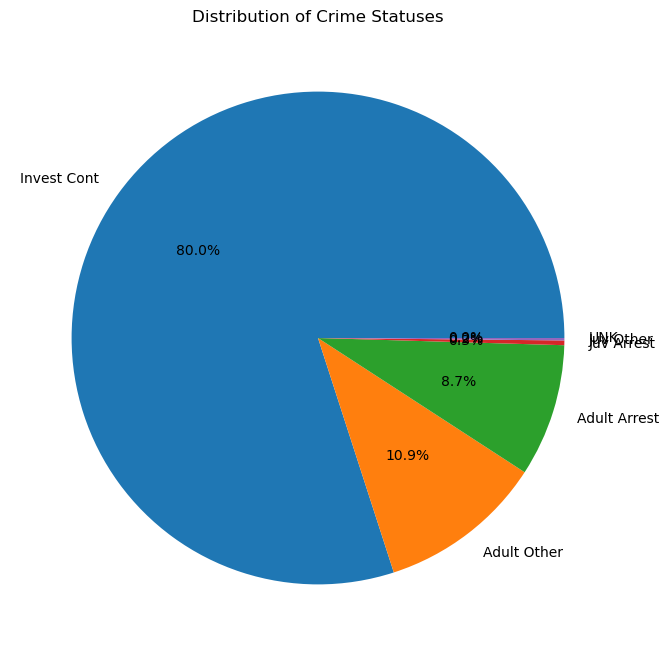

In [26]:
# Get counts of each crime status
status_counts = df['Status Desc'].value_counts()

# Create pie chart
plt.figure(figsize=(8,8))
plt.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Crime Statuses')
plt.show()

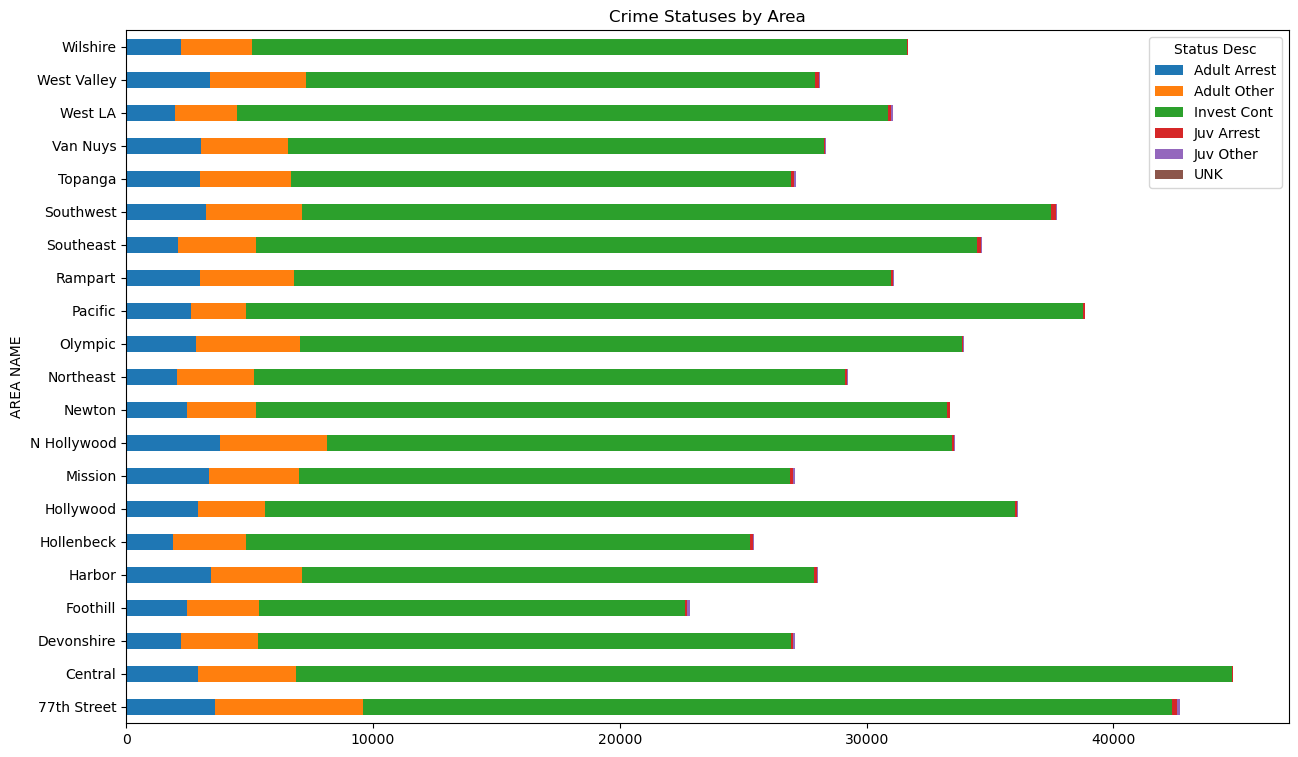

In [30]:
# Group by area and status
area_status_counts = df.groupby(['AREA NAME', 'Status Desc']).size().unstack(fill_value=0)

# Create stacked bar chart
area_status_counts.plot(kind='barh', stacked=True, figsize=(15,9))
plt.title('Crime Statuses by Area')
plt.show()